# VLC Simulation figures

### Imports

In [1]:
from figures import *
from rays_math import *
from utils import *
from simulator import *

ModuleNotFoundError: No module named 'src'

***
## Random Vectors generations

The first step is to generate rays that point to a random direction. Those rays must be generated in a hemisphere.

#### Uniform distribution on angle

With this distribution, there is more ray at the top of the hemisphere 

In [2]:
n = 1000

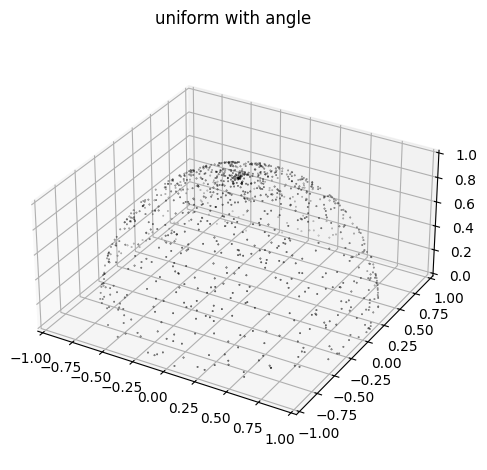

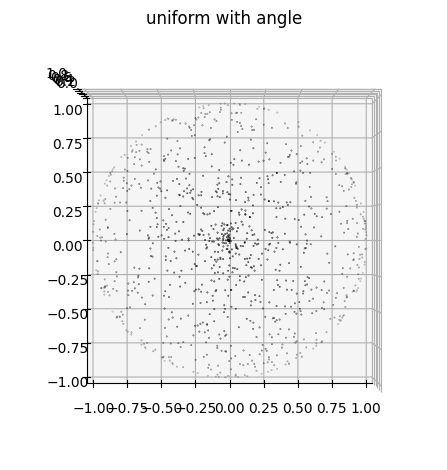

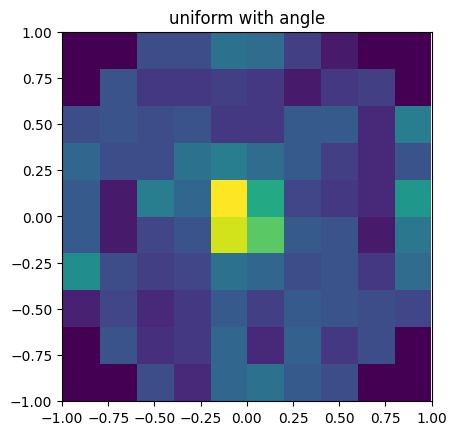

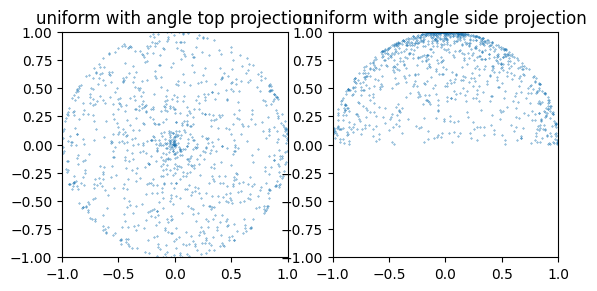

In [3]:
plot_random_vectors(1, n)

#### Uniform distribution inside a cube

With this distribution, there is more point on at the corner of the cube

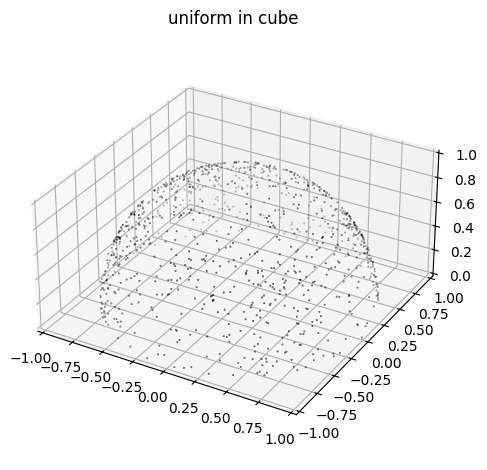

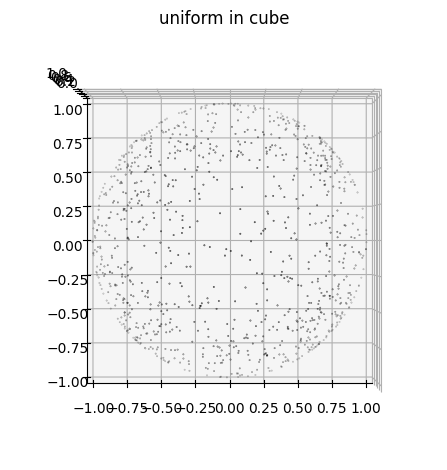

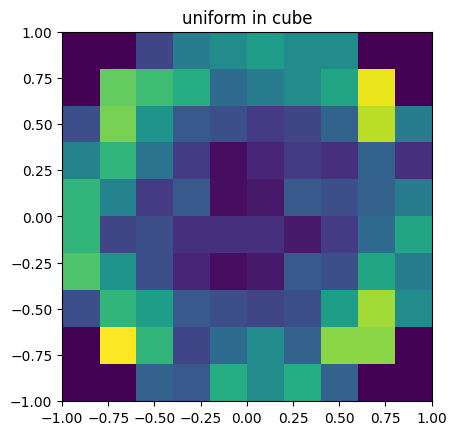

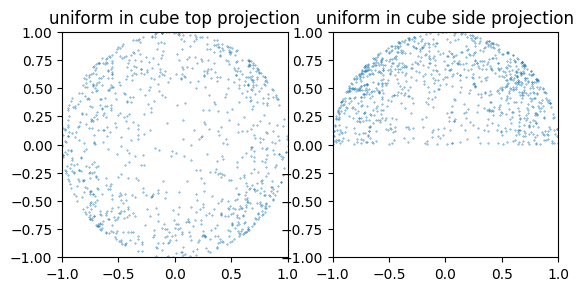

In [4]:
plot_random_vectors(2, n)

#### Normal distribution

Using a normal distribution, point are equally distributed over the hemisphere

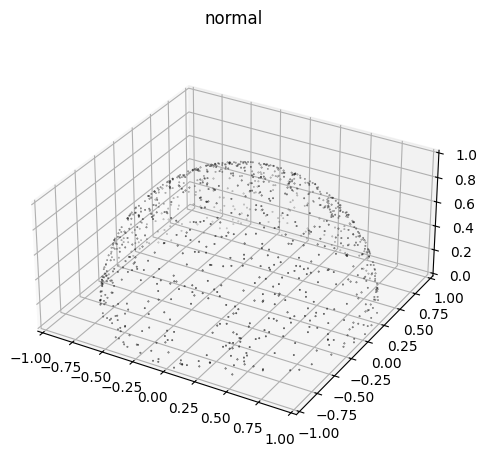

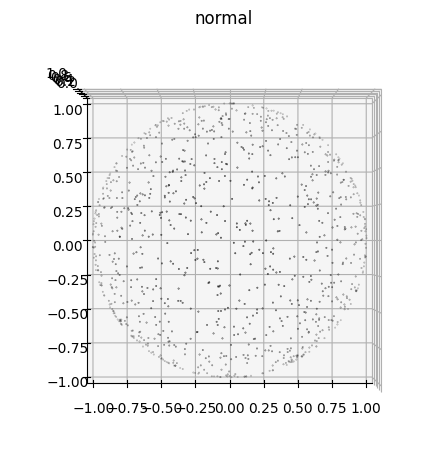

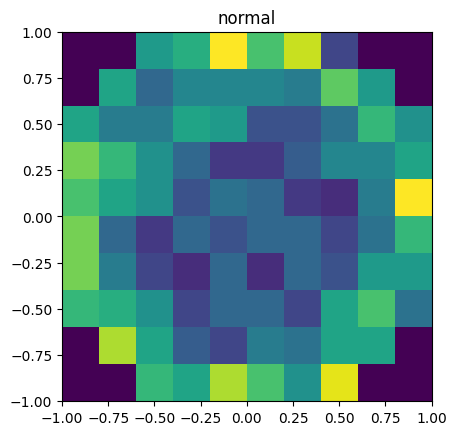

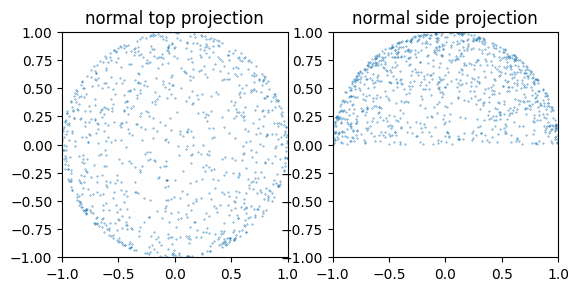

In [5]:
plot_random_vectors(3, n)

***
## Rays align

Once the rays are generated, they must be aligned with the direction of an emitter. 

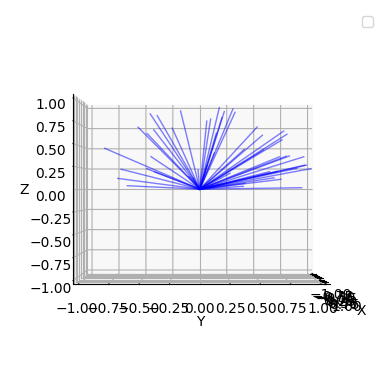

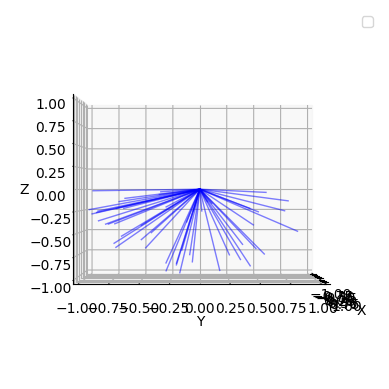

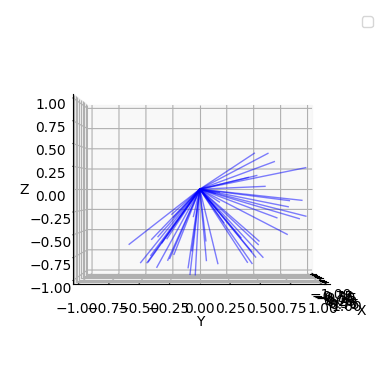

In [6]:
rays = generate_points_normal(50)

z_axis = np.array([0, 0, 1])
bottom_vec = np.array([0, 0, -1])
diag_vec = np.array([0, 1, -1])

bottom_align = align_rays(rays, z_axis, bottom_vec)
diag_align = align_rays(rays, z_axis, diag_vec)

plot_rays(rays, (0, 0, 0))
plot_rays(bottom_align, (0, 0, 0))
plot_rays(diag_align, (0, 0, 0))

***
## Collision of a ray to a triangle

Now we need to check collision of the rays with triangles. We want to find the closest triangle with which it collides, and we want to get the normal of this triangle for reflexion later.

Closest triangle indices: [0 2]
Closest distances: [1.         0.55901699]


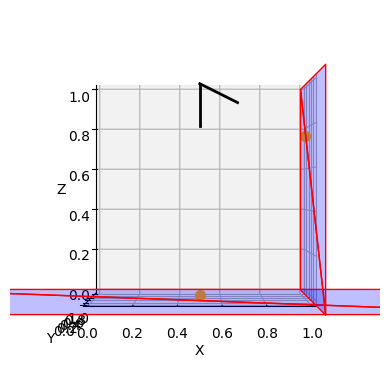

In [7]:
# Data
ray_origins = np.array([[0.5, 0.5, 1], [0.5, 0.5, 1]])
ray_directions = np.array([[0, 0, -1], [1, 0, -0.5]])
ray_directions = normalize_batch(ray_directions)

triangles = np.array([
    [[2, -1, 0], [-1, 1, 0], [2, 1, 0]],
    [[2, -1, 0], [-1, 1, 0], [-1, -1, 0]],
    [[1, -1, 0], [1, 1, 0], [1, 1, 1]],
    [[1, -1, 0], [1, -1, 1], [1, 1, 1]],
])

closest_tri_indices, closest_distances = find_first_collision(ray_origins, ray_directions, triangles)

print("Closest triangle indices:", closest_tri_indices)
print("Closest distances:", closest_distances)

plot_triangles_rays(ray_origins, ray_directions, triangles, closest_distances)

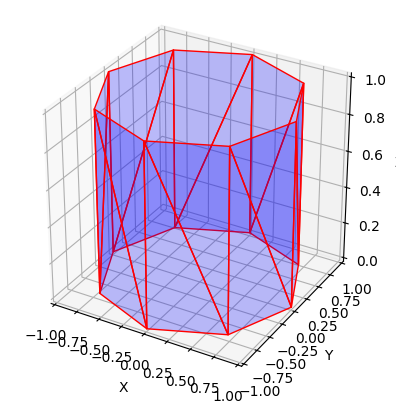

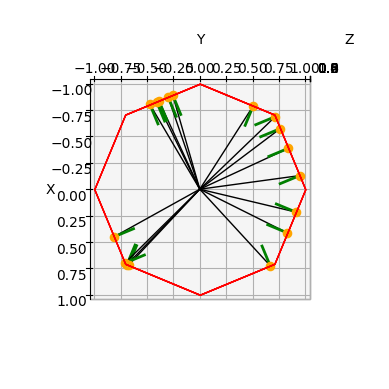

In [8]:
ray_directions = generate_points_normal(20)
ray_directions = align_rays(ray_directions, np.array([0, 0, 1]), np.array([0, 0, -1]))

ray_origins = np.array([[0,0,1]]*20)

triangles = load_triangles_from_file("octo_empty")
vertices, normals, _ = get_triangles_values(triangles)

closest_tri_indices, closest_distances = find_first_collision(ray_origins, ray_directions, vertices)

plot_triangles(triangles)
plot_collisions(ray_origins, ray_directions, triangles, closest_tri_indices, closest_distances)

***
## Simulation with only LOS rays

#### One lamp at the center of the room

0.0605528293151856 0.48788922022151066


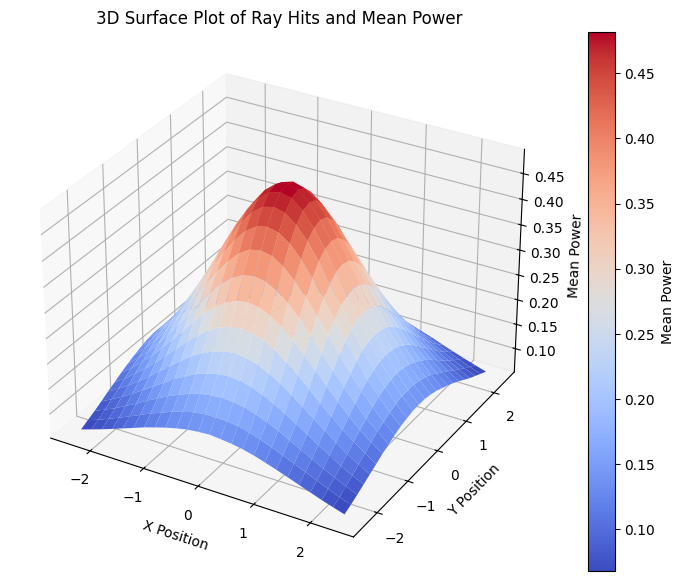

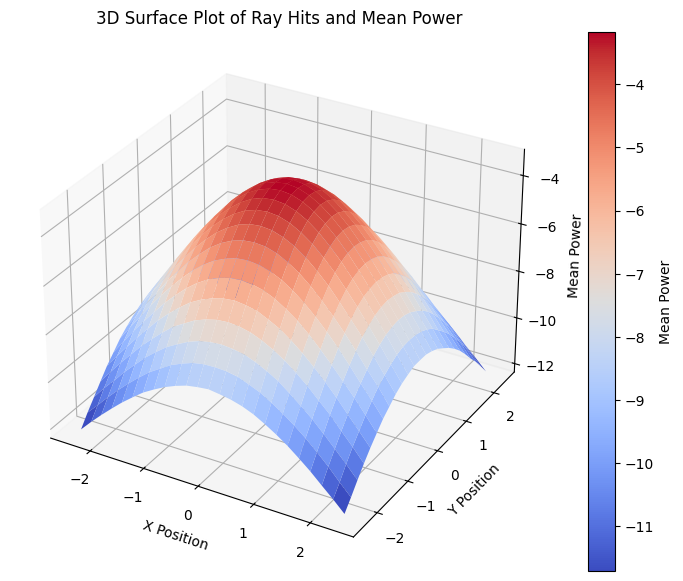

In [9]:
# Emitter
h = 2.5
theta = 60
power = 200

# Receiver
angle = 60
area = 0.016
index = 1.5


emitter = Emitter(np.array([0, 0, h]), np.array([0, 0, -1]), power, theta)
receiver = Receiver(0.000001, angle, area, index, (-2.5, 2.5, -2.5, 2.5))
    
triangles = load_triangles_from_file("example_room")

simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 25)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power)
plot_surface(X, Y, 10 * np.log10(mean_power))

#### Four lamps

4.15972502125787e-05 0.050439703072799824


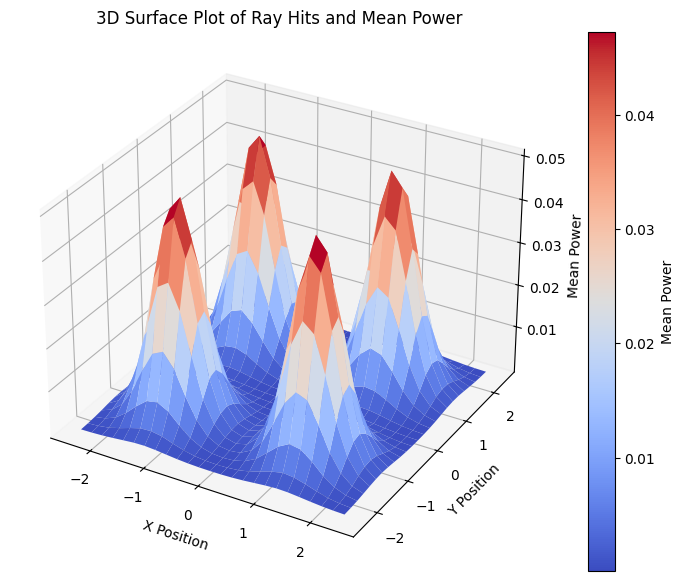

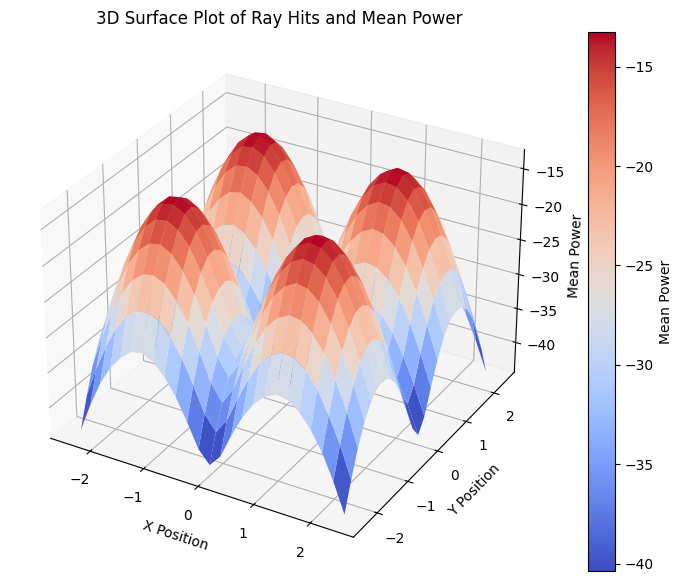

In [10]:
# Emitter
h = 2.15
theta = 12.5
power = 200

# Receiver
angle = 70
area = 1e-4
index = 1.5

emitter1 = Emitter(np.array([-1.25, -1.25, h]), np.array([0, 0, -1]), power, theta)
emitter2 = Emitter(np.array([-1.25, 1.25, h]), np.array([0, 0, -1]), power, theta)
emitter3 = Emitter(np.array([1.25, -1.25, h]), np.array([0, 0, -1]), power, theta)
emitter4 = Emitter(np.array([1.25, 1.25, h]), np.array([0, 0, -1]), power, theta)

receiver = Receiver(0.00001, angle, area, index, (-2.5, 2.5, -2.5, 2.5))
    
triangles = load_triangles_from_file("example_room")

simulation = VLCSimulator([emitter1, emitter2, emitter3, emitter4], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 25)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power)
plot_surface(X, Y, 10 * np.log10(mean_power))

#### One lamp centered with a different normal

0.0016068440178440581 0.314544527756988


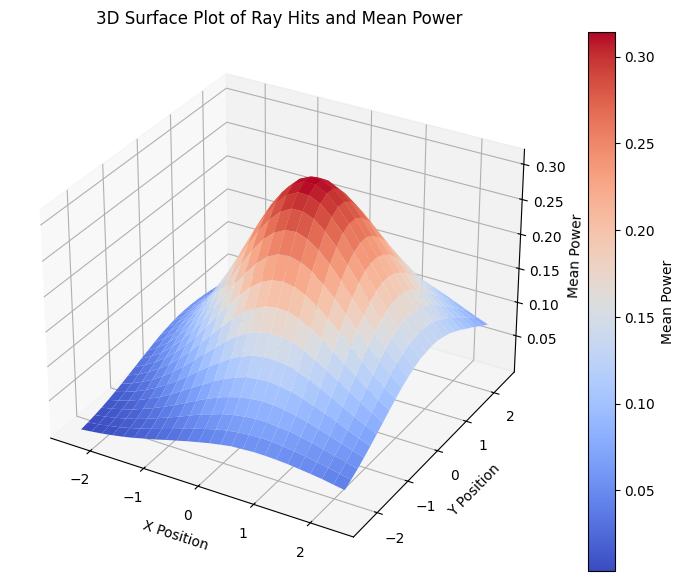

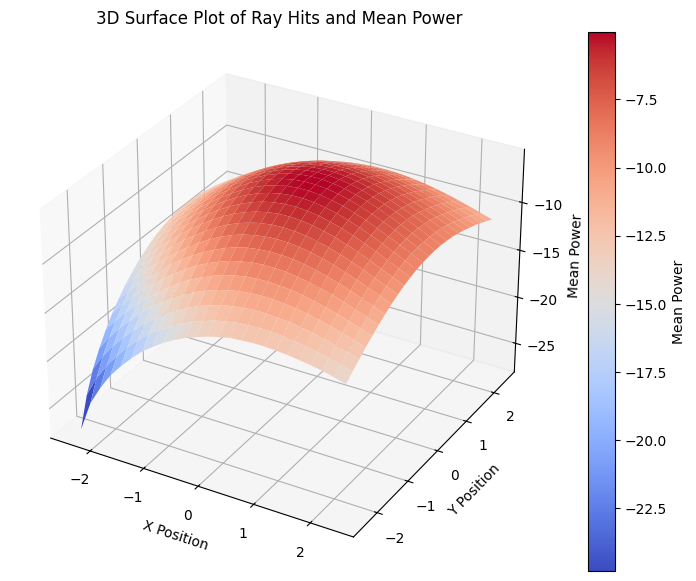

In [11]:
# Emitter
h = 2.5
theta = 60
power = 200

# Receiver
angle = 90
area = 0.016
index = 1.5

emitter_direction = np.array([0.5, 0.5, -1])
emitter_direction = normalize(emitter_direction)

emitter = Emitter(np.array([0, 0, h]), emitter_direction, power, theta)
receiver = Receiver(0.000001, angle, area, index, (-2.5, 2.5, -2.5, 2.5))

triangles = load_triangles_from_file("example_room")

simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 25)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power)
plot_surface(X, Y, 10 * np.log10(mean_power+0.0001))

#### One lamp in the room with an octagonal shape

0.0 3.0542391389721826


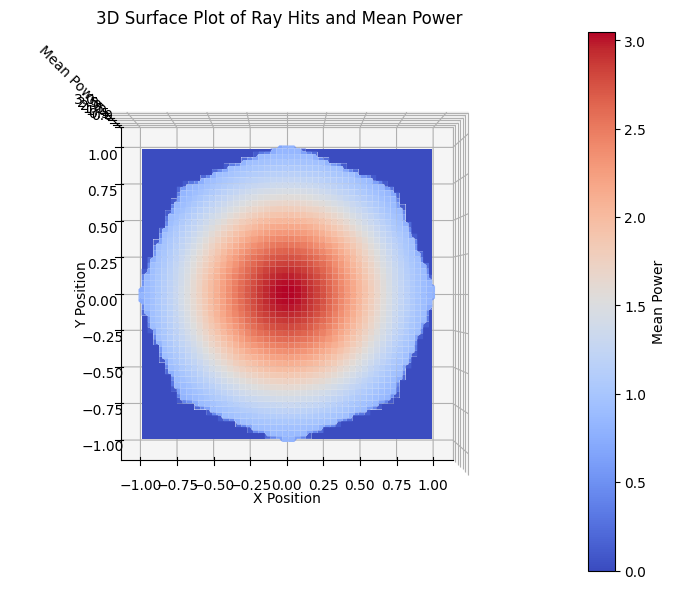

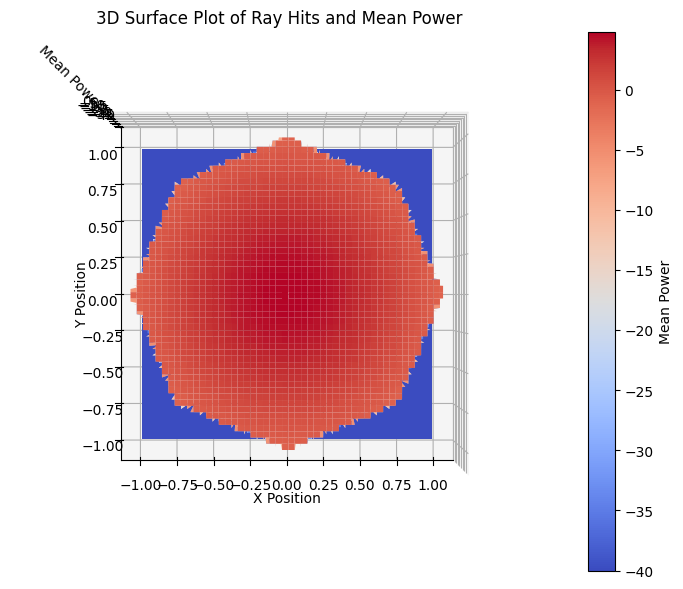

In [12]:
# Emitter
h = 1
theta = 60
power = 200

# Receiver
angle = 60
area = 0.016
index = 1.5

emitter_direction = np.array([0, 0, -1])
emitter_direction = normalize(emitter_direction)

emitter = Emitter(np.array([0, 0, h]), emitter_direction, power, theta)
receiver = Receiver(0.000001, angle, area, index, (-1, 1, -1, 1))

triangles = load_triangles_from_file("octo_empty")

simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 100)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power, view=(90, -90, 0))
plot_surface(X, Y, 10 * np.log10(mean_power+0.0001), view=(90, -90, 0))

#### One lamp in a corner room

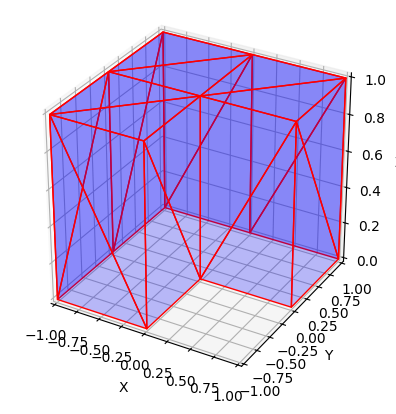

In [13]:
triangles = load_triangles_from_file("corner_room")
plot_triangles(triangles)

0.0 2.827595739496525


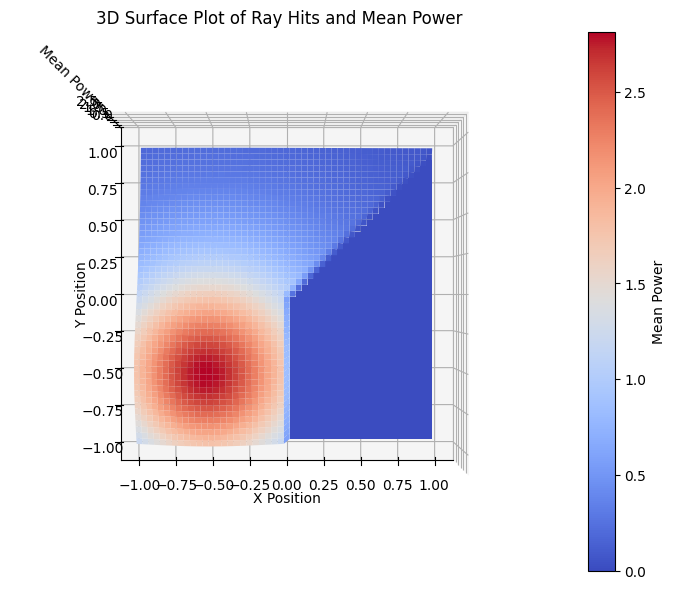

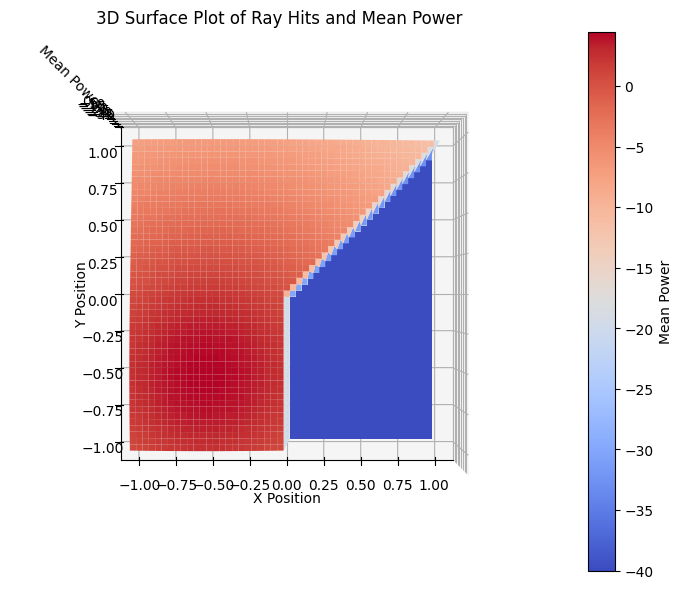

In [14]:
# Emitter
h = 0.9
theta = 60
power = 200

# Receiver
angle = 90
area = 0.016
index = 1.5

emitter_direction = np.array([0, 0, -1])
emitter_direction = normalize(emitter_direction)

emitter = Emitter(np.array([-0.5, -0.5, h]), emitter_direction, power, theta)
receiver = Receiver(0, angle, area, index, (-1, 1, -1, 1))
triangles = load_triangles_from_file("corner_room")

simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 50)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power, view=(90, -90, 0))
plot_surface(X, Y, 10 * np.log10(mean_power+0.0001), view=(90, -90, 0))

***
## Simulation with reflections rays

#### One emitter at the center of the room

In [2]:
from figures import *
from rays_math import *
from utils import *
from simulator import *

# Emitter
h = 2.15
theta = 60
power = 200

# Receiver
angle = 60
area = 0.016
index = 1.5

rho = 0.8

emitter = Emitter(np.array([0, 0, h]), np.array([0, 0, -1]), power, theta)
receiver = Receiver(0, angle, area, index, (-2.5, 2.5, -2.5, 2.5))
    
triangles = load_triangles_from_file("example_room", rho)
simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, nlos_mean_power = simulation.do_simulation(10000, 100, 100, 20)
#print(np.min(mean_power), np.max(mean_power))
X = X[1:-1, 1:-1]
Y = Y[1:-1, 1:-1]
mean_power = mean_power[1:-1, 1:-1]
nlos_mean_power = nlos_mean_power[1:-1, 1:-1]
plot_surface(X, Y, mean_power)
plot_surface(X, Y, nlos_mean_power)
plot_surface(X, Y, mean_power + nlos_mean_power)
plot_surface(X, Y, 10 * np.log10(mean_power + nlos_mean_power))

ImportError: cannot import name 'mplDeprecation' from 'matplotlib._api.deprecation' (C:\Users\VeroGeorl\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\_api\deprecation.py)